In [3]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
tf.enable_eager_execution()

In [4]:
# import tensorflow as tf
# import tensorflow.contrib.eager as tfe
# tf.enable_eager_execution()
import random
import matplotlib.pyplot as plt
import numpy as np
#import miniscope_utils_tf as msu    #Changed to import miniscope utilities as msu so names like "Model" aren't confusing
from miniscope_utils_tf import *
from miniscope_model import Model as msu_model
#import utils as krist
import scipy.misc as sc
import scipy.ndimage as ndim
import scipy.misc as misc
from scipy import signal

from skimage.transform import resize as imresize
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from IPython import display

import os
from os import listdir
from os.path import isfile, join
import matplotlib.animation as animation

import time
from itertools import permutations
from itertools import combinations
#import copy
#from bridson import poisson_disc_samples


import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm as __cm__

In [5]:
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [6]:
#with tf.device('/cpu:0'):
model = msu_model()  # zsampling options: 'fixed' or 'uniform_random'

In [7]:
model = msu_model()  # zsampling options: 'fixed' or 'uniform_random'
Rmat=model(0)

# Save initial values for later comparison 
R_init = Rmat
Tinit,_=make_lenslet_tf(model)
xinit = tf.Variable(tf.zeros(model.Nlenslets))
tf.assign(xinit, model.xpos)


yinit = tf.Variable(tf.zeros(model.Nlenslets))
tf.assign(yinit, model.ypos)

rinit = tf.Variable(tf.zeros(model.Nlenslets))
tf.assign(rinit, model.rlist)

offsetinit = tf.Variable(tf.zeros(model.Nlenslets))
tf.assign(offsetinit, model.lenslet_offset)

model_init=msu_model()
Rmat_init = model_init(0)
tf.assign(model_init.lenslet_offset, offsetinit)
tf.assign(model_init.xpos, xinit)
tf.assign(model_init.ypos, yinit)
tf.assign(model_init.rlist, rinit)

<tf.Variable 'UnreadVariable' shape=(31,) dtype=float32, numpy=
array([ 4.990099 ,  3.440273 ,  4.5201793,  4.253165 ,  3.5244756,
        3.7058823,  9.692307 ,  6.3      ,  5.793103 ,  4.6666665,
        4.8229666,  8.064    ,  4.1311474,  3.9069767,  3.8037736,
       10.391752 ,  4.382609 ,  5.169231 ,  5.569061 ,  3.36     ,
        5.361702 ,  9.081081 ,  3.612903 , 11.2      ,  6.9041095,
        8.542373 ,  6.5882354,  7.6363635,  7.2517986,  4.0159364,
        6.0359282], dtype=float32)>

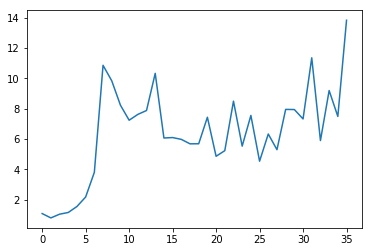

In [8]:
plt.plot(Rmat_init.numpy())

In [9]:
T,aper=make_lenslet_tf(model)

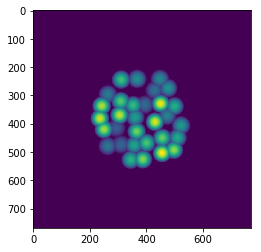

In [10]:
plt.imshow(Tinit)

In [11]:
def make_lenslet_tf(model):
        T = tf.zeros([model.samples[0],model.samples[1]])
        for n in range(model.Nlenslets):
            sph1 = model.lenslet_offset[n]+tf.real(tf.sqrt(tf.square(model.rlist[n]) - tf.square((model.xgm-
                                                                          model.xpos[n])) - tf.square((model.ygm-model.ypos[n]))))-tf.real(tf.sqrt(tf.square(model.rlist[n]
                                                                          )-tf.square(model.mean_lenslet_CA)))
            T = tf.maximum(T,sph1)
        aper = tf.sqrt(model.xgm**2+model.ygm**2) <= model.CA
        return T,aper
    

In [12]:
def zernikecartesian(coefficient,x,y):
    """
    ------------------------------------------------
    __zernikecartesian__(coefficient,x,y):

    Return combined aberration

    Zernike Polynomials Caculation in Cartesian coordinates

    coefficient: Zernike Polynomials Coefficient from input
    x: x in Cartesian coordinates
    y: y in Cartesian coordinates
    ------------------------------------------------
    """
    Z = [0]+coefficient
    r = np.sqrt(x**2 + y**2)
    Z1  =  Z[1]  * 1
    Z2  =  Z[2]  * 2*x
    Z3  =  Z[3]  * 2*y
    Z4  =  Z[4]  * np.sqrt(3)*(2*r**2-1)
    Z5  =  Z[5]  * 2*np.sqrt(6)*x*y
    Z6  =  Z[6]  * np.sqrt(6)*(x**2-y**2)
    Z7  =  Z[7]  * np.sqrt(8)*y*(3*r**2-2)
    Z8  =  Z[8]  * np.sqrt(8)*x*(3*r**2-2)
    Z9  =  Z[9]  * np.sqrt(8)*y*(3*x**2-y**2)
    Z10 =  Z[10] * np.sqrt(8)*x*(x**2-3*y**2)
    #Z11 =  Z[11] * __sqrt__(5)*(6*r**4-6*r**2+1)
    #Z12 =  Z[12] * __sqrt__(10)*(x**2-y**2)*(4*r**2-3)
    #Z13 =  Z[13] * 2*__sqrt__(10)*x*y*(4*r**2-3)
    #Z14 =  Z[14] * __sqrt__(10)*(r**4-8*x**2*y**2)
    #Z15 =  Z[15] * 4*__sqrt__(10)*x*y*(x**2-y**2)
    #Z16 =  Z[16] * __sqrt__(12)*x*(10*r**4-12*r**2+3)
    #Z17 =  Z[17] * __sqrt__(12)*y*(10*r**4-12*r**2+3)
    #Z18 =  Z[18] * __sqrt__(12)*x*(x**2-3*y**2)*(5*r**2-4)
    #Z19 =  Z[19] * __sqrt__(12)*y*(3*x**2-y**2)*(5*r**2-4)
    #Z20 =  Z[20] * __sqrt__(12)*x*(16*x**4-20*x**2*r**2+5*r**4)
    #Z21 =  Z[21] * __sqrt__(12)*y*(16*y**4-20*y**2*r**2+5*r**4)
    #Z22 =  Z[22] * __sqrt__(7)*(20*r**6-30*r**4+12*r**2-1)
    #Z23 =  Z[23] * 2*__sqrt__(14)*x*y*(15*r**4-20*r**2+6)
    #Z24 =  Z[24] * __sqrt__(14)*(x**2-y**2)*(15*r**4-20*r**2+6)
    #Z25 =  Z[25] * 4*__sqrt__(14)*x*y*(x**2-y**2)*(6*r**2-5)
    #Z26 =  Z[26] * __sqrt__(14)*(8*x**4-8*x**2*r**2+r**4)*(6*r**2-5)
    #Z27 =  Z[27] * __sqrt__(14)*x*y*(32*x**4-32*x**2*r**2+6*r**4)
    #Z28 =  Z[28] * __sqrt__(14)*(32*x**6-48*x**4*r**2+18*x**2*r**4-r**6)
    #Z29 =  Z[29] * 4*y*(35*r**6-60*r**4+30*r**2-4)
    #Z30 =  Z[30] * 4*x*(35*r**6-60*r**4+30*r**2-4)
    #Z31 =  Z[31] * 4*y*(3*x**2-y**2)*(21*r**4-30*r**2+10)
    #Z32 =  Z[32] * 4*x*(x**2-3*y**2)*(21*r**4-30*r**2+10)
    #Z33 =  Z[33] * 4*(7*r**2-6)*(4*x**2*y*(x**2-y**2)+y*(r**4-8*x**2*y**2))
    #Z34 =  Z[34] * (4*(7*r**2-6)*(x*(r**4-8*x**2*y**2)-4*x*y**2*(x**2-y**2)))
    #Z35 =  Z[35] * (8*x**2*y*(3*r**4-16*x**2*y**2)+4*y*(x**2-y**2)*(r**4-16*x**2*y**2))
    #Z36 =  Z[36] * (4*x*(x**2-y**2)*(r**4-16*x**2*y**2)-8*x*y**2*(3*r**4-16*x**2*y**2))
    #Z37 =  Z[37] * 3*(70*r**8-140*r**6+90*r**4-20*r**2+1)
    ZW =     Z1 + Z2 +  Z3+  Z4+  Z5+  Z6+  Z7+  Z8+  Z9+ Z10
    #+ Z11+ Z12+ Z13+ Z14+ Z15+ Z16+ Z17+ Z18+ Z19+ \
            #Z20+ Z21+ Z22+ Z23+ Z24+ Z25+ Z26+ Z27+ Z28+ Z29+ \
            #Z30+ Z31+ Z32+ Z33+ Z34+ Z35+ Z36+ Z37
    return ZW


$$o_n + \sqrt{r_n^2 - (x-x_n)^2 - (y-y_n)^2 } - \sqrt{r_n^2 - r_{mean}^2} $$ 

In [13]:
__coefficients__ = []
__zernikelist__ = [ "Z00 Piston or Bias",
                    "Z11 x Tilt",
                    "Z11 y Tilt",
                    "Z20 Defocus",
                    "Z22 Primary Astigmatism at 45",
                    "Z22 Primary Astigmatism at 0",
                    "Z31 Primary y Coma",
                    "Z31 Primary x Coma",
                    "Z33 y Trefoil",
                    "Z33 x Trefoil"]
                    '''"Z40 Primary Spherical",
                    "Z42 Secondary Astigmatism at 0",
                    "Z42 Secondary Astigmatism at 45",
                    "Z44 x Tetrafoil",
                    "Z44 y Tetrafoil",
                    "Z51 Secondary x Coma",
                    "Z51 Secondary y Coma",
                    "Z53 Secondary x Trefoil",
                    "Z53 Secondary y Trefoil",
                    "Z55 x Pentafoil",
                    "Z55 y Pentafoil",
                    "Z60 Secondary Spherical",
                    "Z62 Tertiary Astigmatism at 45",
                    "Z62 Tertiary Astigmatism at 0",
                    "Z64 Secondary x Trefoil",
                    "Z64 Secondary y Trefoil",
                    "Z66 Hexafoil Y",
                    "Z66 Hexafoil X",
                    "Z71 Tertiary y Coma",
                    "Z71 Tertiary x Coma",
                    "Z73 Tertiary y Trefoil",
                    "Z73 Tertiary x Trefoil",
                    "Z75 Secondary Pentafoil Y",
                    "Z75 Secondary Pentafoil X",
                    "Z77 Heptafoil Y",
                    "Z77 Heptafoil X",
                    "Z80 Tertiary Spherical"]'''
                   

IndentationError: unexpected indent (<ipython-input-13-fb88b517e555>, line 12)

In [14]:
zern_list = []
for i in range(model.Nlenslets):
    #zern_list.append([0,0,0,0,0,0,0,0,0,0])
    
    aberrations = np.zeros(11)
    aberrations[5]  = np.random.uniform(low=0, high = .02)
    aberrations[6]  = np.random.uniform(low=0, high = .02)
    zern_list.append(aberrations)
    
    

In [15]:
testvar = tf.Variable(zern_list, dtype='float32')

In [16]:
def make_lenslet_tf(model):
        T = tf.zeros([model.samples[0],model.samples[1]])
        for n in range(model.Nlenslets):
            sph1 = model.lenslet_offset[n]+tf.real(tf.sqrt(tf.square(model.rlist[n]) - tf.square((model.xgm-
                                                                          model.xpos[n])) - tf.square((model.ygm-model.ypos[n]))))-tf.real(tf.sqrt(tf.square(model.rlist[n]
                                                                          )-tf.square(model.mean_lenslet_CA)))
            T = tf.maximum(T,sph1)
        aper = tf.sqrt(model.xgm**2+model.ygm**2) <= model.CA
        return T,aper
    

In [17]:

# Normalized coordinates
x = model.xgm.numpy()/np.max(model.xgm)
y = model.ygm.numpy()/np.max(model.ygm) 



def make_lenslet_tf_zern(model, zern_list):
    T = tf.zeros([model.samples[0],model.samples[1]])
    
    if len(zern_list) > 0: 
        T_orig = tf.zeros([model.samples[0],model.samples[1]])
    else:
        T_orig = []
    
    for n in range(model.Nlenslets):
        sph1 = tf.real(tf.sqrt(tf.square(model.rlist[n]) - tf.square((model.xgm- model.xpos[n]))- tf.square((model.ygm-model.ypos[n])))
                                          )-tf.real(tf.sqrt(tf.square(model.rlist[n])-tf.square(model.mean_lenslet_CA)))
        
        if len(zern_list) > 0:  # Including Zernike aberrations 
            Z = zernikecartesian(zern_list[n],  x - model.xpos[n].numpy()/np.max(model.xgm)  ,y - model.ypos[n].numpy()/np.max(model.xgm))
            
            r = 1 # Not sure about this
            Z[(x - model.xpos[n].numpy()/np.max(model.xgm) )**2+(y - model.ypos[n].numpy()/np.max(model.xgm))**2>r**2]=0 # Crop to be a circle
            sph2 = model.lenslet_offset[n]+ sph1 + Z
            
            
            T_orig = tf.maximum(T_orig,sph1 + model.lenslet_offset[n])
            T = tf.maximum(T,sph2)
        else:
            T = tf.maximum(T,sph1 + model.lenslet_offset[n])
            
        
    aper = tf.sqrt(model.xgm**2+model.ygm**2) <= model.CA
    return T, aper, T_orig

In [18]:
T2, aper, _ = make_lenslet_tf_zern(model, [])

In [19]:
T2, aper, _ = make_lenslet_tf_zern(model, [])

In [20]:
#zern_list = [0,0,0,0,0,0,0,0,0,0];
#zern_list[] = 0.01
#zern_list[4] = 0.01
#zern_list[4] = 0.01
#zern_list[9] = 0.01

T2, aper, T1  = make_lenslet_tf_zern(model, zern_list)

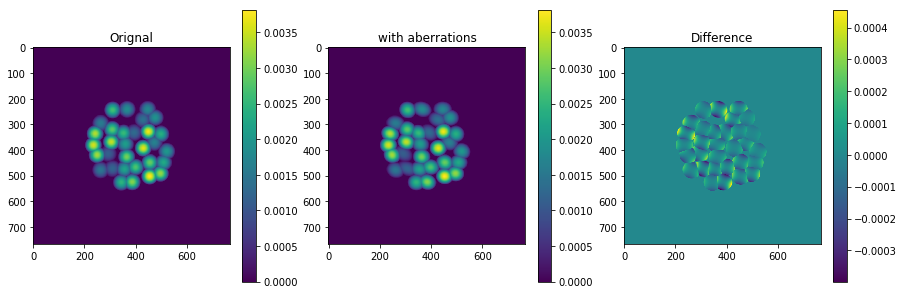

In [21]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1); plt.imshow(T1); plt.title('Orignal'); plt.colorbar()
plt.subplot(1,3,2); plt.imshow(T2); plt.title('with aberrations'); plt.colorbar()
plt.subplot(1,3,3); plt.imshow(T2-T1); plt.title('Difference'); plt.colorbar()

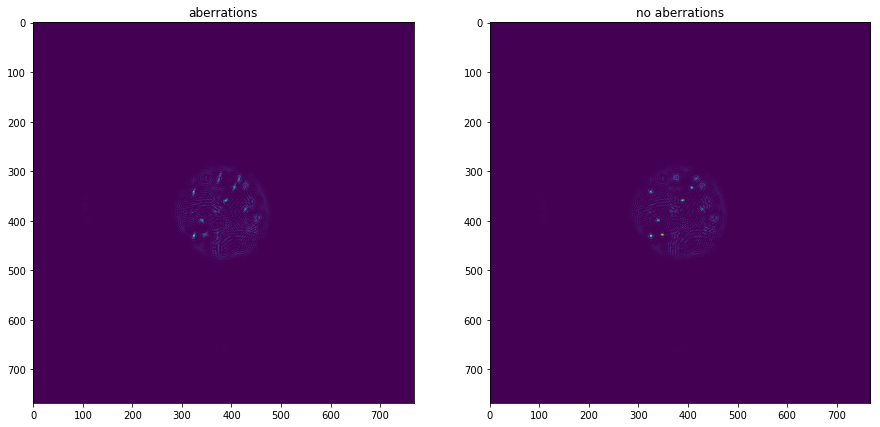

In [22]:
zplanes1 = 1./(np.linspace(1/model.zmin_virtual, 1./model.zmax_virtual, model.Nz*2))

psf_stack1 = model.gen_psf_stack(T2, aper, .5, zplanes = zplanes1)
psf_stack2 = model.gen_psf_stack(T1, aper, .5, zplanes = zplanes1)

for z in range(len(psf_stack2)):
    fig = plt.figure(figsize=(15,10))
    plt.cla()
    plt.subplot(1,2,1), plt.imshow(psf_stack1[z].numpy()); plt.title('aberrations')
    plt.subplot(1,2,2), plt.imshow(psf_stack2[z].numpy()); plt.title('no aberrations')

    display.display(fig)
    display.clear_output(wait=True)
    plt.pause(.5)

In [23]:
def get_R(model, T):
    defocus_list = 1./(np.linspace(1/model.zmin_virtual, 1./model.zmax_virtual, model.Nz)) #mm or dioptres
    #T,aper=make_lenslet_tf(self) #offset added

    #         # Get psf stack
    zstack = model.gen_psf_stack(T, aper, 0.5, defocus_list)

    psf_spect = model.gen_stack_spectrum(zstack)
    normsize=tf.to_float(tf.shape(psf_spect)[0]*tf.shape(psf_spect)[1])

    Rmat_tf_diag = []
    Rmat_tf_off_diag = []
    #calculating Xcorr


    # This now computes diagonals and off-diagonals separately then concatenates them. this makes is easier to "find" the diagonals/off diagonals for separate treatment  later.
    for z1 in range(model.Nz):
        for z2 in range(z1, model.Nz):
            Fcorr = tf.conj(psf_spect[z1])*psf_spect[z2]
            if z1 == z2:
                # Difference between autocorrelation and target bandwidth
                if model.ignore_dc:  
                    # Remove DC (assume no fftshift!)

                    Rmat_tf_diag.append(tf.reduce_sum(model.dc_mask * (tf.square((tf.abs(Fcorr) - model.target_F)/normsize))))
                else:
                    Rmat_tf_diag.append(tf.reduce_sum(tf.square((tf.abs(Fcorr) - model.target_F)/normsize)))

            else:
                # Target is zero for cross correlation
                if model.cross_corr_norm is 'l2':
                    Rmat_tf_off_diag.append( model.tau * tf.reduce_sum(tf.square(tf.abs(Fcorr)/normsize)))  #changed to one norm
                elif model.cross_corr_norm is 'log_sum_exp':   
                    # Implementation of eq. 7 from http://users.cecs.anu.edu.au/~yuchao/files/SmoothApproximationforL-infinityNorm.pdf
                    ccorr = tf.abs(tf.ifft2d(Fcorr))
                    Rmat_tf_off_diag.append(2 * model.tau * model.logsumexp_param * tf.reduce_logsumexp(tf.square(ccorr)/model.logsumexp_param) )

                elif model.cross_corr_norm is 'inf':
                    Rmat_tf_off_diag.append(model.tau * tf.reduce_max(tf.abs(tf.ifft2d(Fcorr))))
    Rmat_tf = tf.concat([Rmat_tf_diag, Rmat_tf_off_diag],0)

    return Rmat_tf #note this returns int data type!! vector not matrix. This is also my loss!

In [24]:
T2, T1, aper = make_lenslet_tf_zern(model, zern_list)

R_aber = get_R(model, T2)
R_norm = get_R(model, T1)



InternalError: Could not find valid device for node.
Node: {{node Mul}} = Mul[T=DT_BOOL](dummy_input, dummy_input)
All kernels registered for op Mul :
  device='CPU'; T in [DT_COMPLEX128]
  device='CPU'; T in [DT_COMPLEX64]
  device='CPU'; T in [DT_INT64]
  device='CPU'; T in [DT_INT16]
  device='CPU'; T in [DT_UINT16]
  device='CPU'; T in [DT_INT8]
  device='CPU'; T in [DT_BFLOAT16]
  device='CPU'; T in [DT_INT32]
  device='CPU'; T in [DT_UINT8]
  device='CPU'; T in [DT_DOUBLE]
  device='CPU'; T in [DT_HALF]
  device='CPU'; T in [DT_FLOAT]
  device='GPU'; T in [DT_COMPLEX128]
  device='GPU'; T in [DT_COMPLEX64]
  device='GPU'; T in [DT_INT64]
  device='GPU'; T in [DT_INT16]
  device='GPU'; T in [DT_UINT16]
  device='GPU'; T in [DT_INT8]
  device='GPU'; T in [DT_INT32]
  device='GPU'; T in [DT_UINT8]
  device='GPU'; T in [DT_DOUBLE]
  device='GPU'; T in [DT_HALF]
  device='GPU'; T in [DT_FLOAT]
 [Op:Mul] name: mul/

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1); plt.plot(R_norm.numpy(), 'o'); plt.plot(R_aber.numpy(), 'x'); plt.legend(('initial', 'with aberrations'))

In [ ]:
np.median(R_aber)

In [ ]:
np.median(R_norm)